In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns 

def load_data(filepath):
    df = pd.read_csv(filepath) 
    return df

df = load_data('C:/Users/nejat/AIM Projects/week0 data/sierraleone-bumbuna.csv')
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [2]:
def summary_statistics(df):
    summary_stats = df.describe()
    return summary_stats

summary_stats = summary_statistics(df)
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [3]:
# Check for missing values in GHI, DNI, and DHI
def check_missing_values(df):
    missing_values = df[['GHI', 'DNI', 'DHI']].isnull().sum()
    return missing_values

missing_values = check_missing_values(df)
print(missing_values)

GHI    0
DNI    0
DHI    0
dtype: int64


In [4]:
def handle_negative_values(df):
    df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]
    return df

print("Negative values in GHI, DNI, DHI:")
print(df)

Negative values in GHI, DNI, DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0

In [5]:
def check_outliers(df):
    # Check for outliers in GHI, DNI, DHI
    z_scores_1 = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
    outliers_1 = df[(z_scores_1 > 3).any(axis=1)]
    
    # Check for outliers in ModA, ModB, WS, WSgust
    z_scores_2 = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))
    outliers_2 = df[(z_scores_2 > 3).any(axis=1)]
    
    return outliers_1, outliers_2

outliers_1, outliers_2 = check_outliers(df)
print("\nPotential outliers in GHI, DNI, and DHI:\n", outliers_1)
print("\nPotential outliers in ModA, ModB, WS, or WSgust:\n", outliers_2)


Potential outliers in GHI, DNI, and DHI:
                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
519235  2022-10-25 13:56  884.0  808.0  170.5  911.0  892.0  34.7  57.8  3.0   
519236  2022-10-25 13:57  881.0  804.0  172.1  907.0  889.0  34.5  57.9  3.0   
519237  2022-10-25 13:58  878.0  801.0  173.4  903.0  885.0  34.5  58.1  3.0   
519238  2022-10-25 13:59  873.0  795.9  174.4  899.0  880.0  34.5  51.8  2.7   
519239  2022-10-25 14:00  865.0  786.7  175.5  890.0  872.0  34.4  53.4  2.2 

In [6]:
def clean_data(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.set_index('Timestamp', inplace=True)
    df_clean = df[['GHI', 'DNI', 'DHI', 'Tamb']].dropna()
    return df_clean

df_clean = clean_data(df)

In [7]:
def plot_time_series(df):
    plt.figure(figsize=(14, 10))
    
    # GHI Over Time
    plt.subplot(4, 1, 1)
    sns.lineplot(data=df, x=df.index, y='GHI')
    plt.title('GHI Over Time')
    plt.xlabel('Time')
    plt.ylabel('GHI')

    # DNI Over Time
    plt.subplot(4, 1, 2)
    sns.lineplot(data=df, x=df.index, y='DNI')
    plt.title('DNI Over Time')
    plt.xlabel('Time')
    plt.ylabel('DNI')

    # DHI Over Time
    plt.subplot(4, 1, 3)
    sns.lineplot(data=df, x=df.index, y='DHI')
    plt.title('DHI Over Time')
    plt.xlabel('Time')
    plt.ylabel('DHI')

    # Tamb Over Time
    plt.subplot(4, 1, 4)
    sns.lineplot(data=df, x=df.index, y='Tamb')
    plt.title('Tamb Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature')

    plt.tight_layout()
    plt.show()

plot_time_series(df_clean)

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

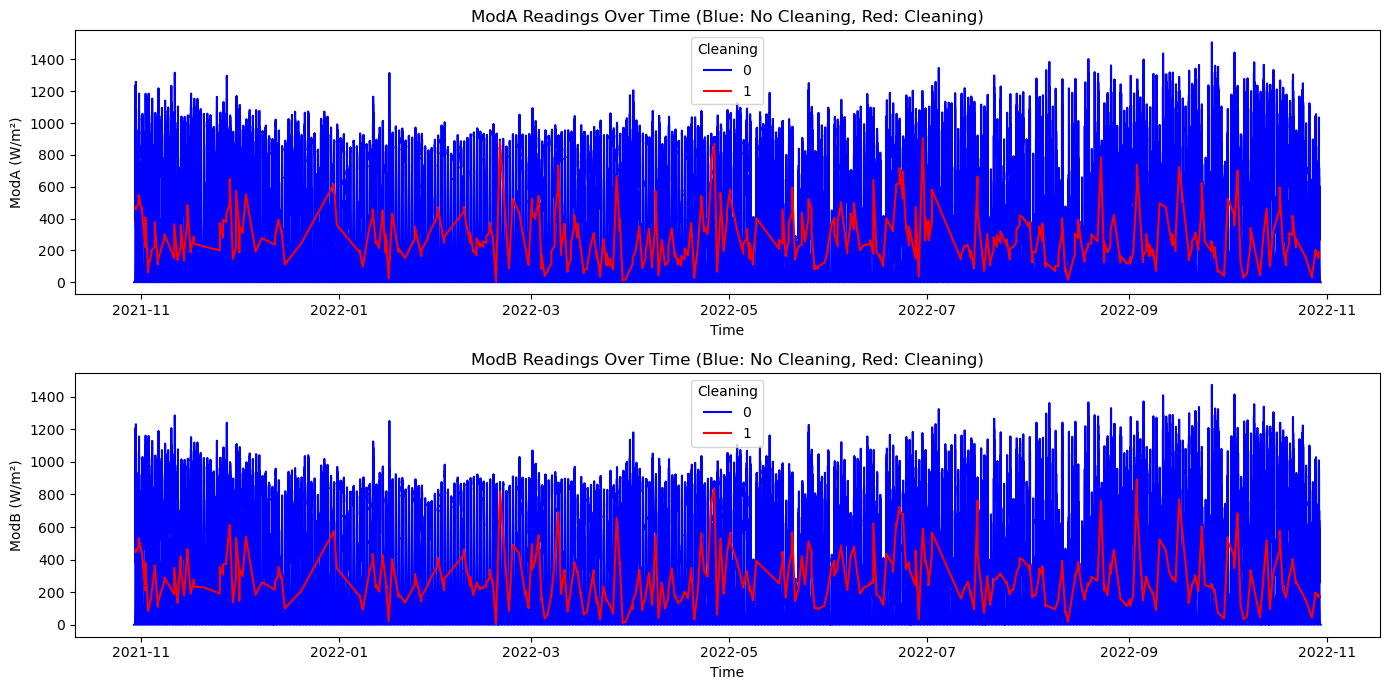

In [8]:
def plot_mod_sensor_readings(df):
    plt.figure(figsize=(14, 7))

    # ModA plot
    plt.subplot(2, 1, 1)
    sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette={0: 'blue', 1: 'red'})
    plt.title('ModA Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
    plt.xlabel('Time')
    plt.ylabel('ModA (W/m²)')

    # ModB plot
    plt.subplot(2, 1, 2)
    sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette={0: 'blue', 1: 'red'})
    plt.title('ModB Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
    plt.xlabel('Time')
    plt.ylabel('ModB (W/m²)')

    plt.tight_layout()
    plt.show()

plot_mod_sensor_readings(df)

In [9]:
def plot_correlation_heatmap(df):
    correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
    correlation_matrix = df[correlation_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)

In [10]:
def plot_wind_data(df):
    wind_data = df[['WS', 'WSgust', 'WD']].dropna()
    wind_data['WD_radians'] = np.radians(wind_data['WD'])

    plt.figure(figsize=(12, 6))
    
    # Wind Speed (WS) vs Wind Direction (WD)
    ax1 = plt.subplot(1, 2, 1, projection='polar')
    ax1.scatter(wind_data['WD_radians'], wind_data['WS'], alpha=0.7, s=10, c=wind_data['WS'], cmap='viridis')
    ax1.set_theta_direction(-1)  # Set the direction of theta
    ax1.set_theta_offset(np.pi / 2.0)  # Set the offset for proper orientation (North = 0 degrees)
    ax1.set_title('Wind Speed vs Direction (WS)', fontsize=14)
    ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)

    # Wind Gust Speed (WSgust) vs Wind Direction (WD)
    ax2 = plt.subplot(1, 2, 2, projection='polar')
    ax2.scatter(wind_data['WD_radians'], wind_data['WSgust'], alpha=0.7, s=10, c=wind_data['WSgust'], cmap='coolwarm')
    ax2.set_theta_direction(-1)
    ax2.set_theta_offset(np.pi / 2.0)
    ax2.set_title('Wind Gust vs Direction (WSgust)', fontsize=14)
    ax2.set_ylabel('Wind Gust (m/s)', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_wind_data(df)

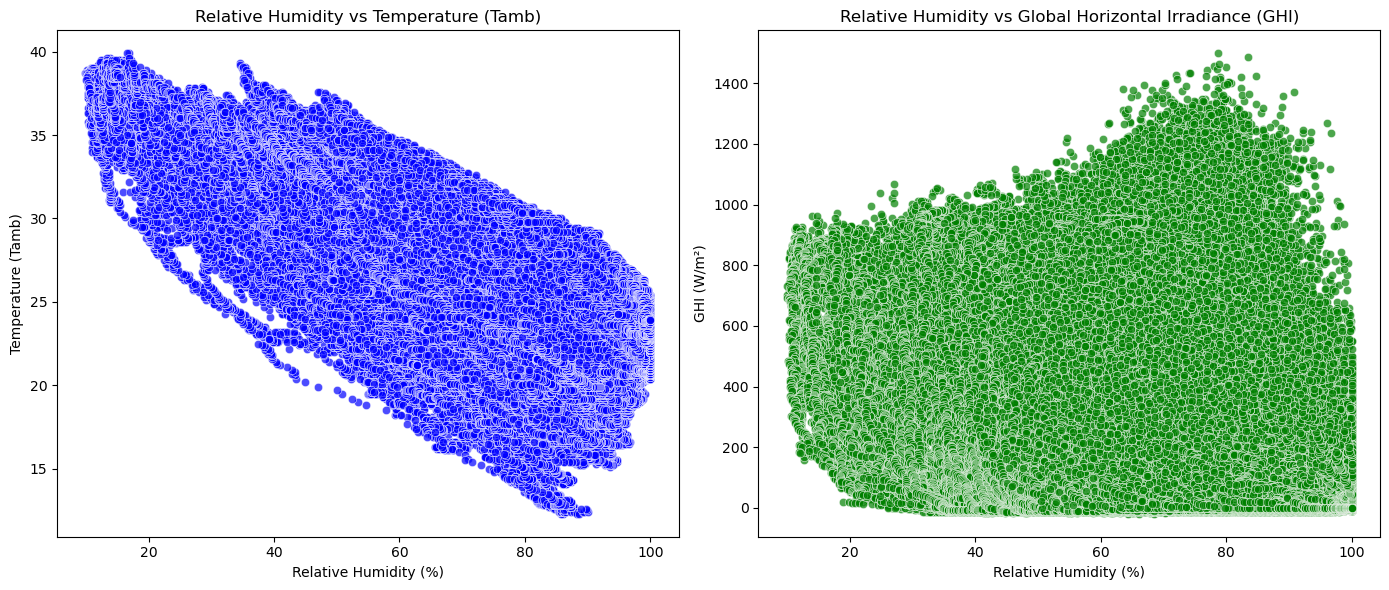

In [11]:
def plot_scatter_plots(df):
    temp_data = df[['RH', 'Tamb', 'GHI']].dropna()

    plt.figure(figsize=(14, 6))

    # Scatter plot: RH vs Temperature
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=temp_data, x='RH', y='Tamb', alpha=0.7, color='blue')
    plt.title('Relative Humidity vs Temperature (Tamb)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (Tamb)')

    # Scatter plot: RH vs Solar Radiation (GHI)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=temp_data, x='RH', y='GHI', alpha=0.7, color='green')
    plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')

    plt.tight_layout()
    plt.show()

plot_scatter_plots(df)

In [12]:
def plot_histograms(df):
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    df[variables].hist(bins=30, figsize=(12, 10))
    plt.show()

plot_histograms(df)

In [13]:
def zscore_outlier_detection(df):
    columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))

    outliers = (z_scores > 3).any(axis=1)
    outliers_data = df[outliers]
    return outliers_data

zscore_outlier_detection(df)

GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-27 15:05:00  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
2022-10-27 15:06:00  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
2022-10-27 15:15:00  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
2022-10-28 17:53:00   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
2022-10-28 17:55:00   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

                     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  \
Timestamp                                                              
2021-10-30 10:54:00     1.1      0.5   81.4      7.9  1002         0   
2021-10-30 10:55:00     2.4      0.4   74.6     12.1  1002         0   
2021-10-30 10:56:00     2.1      0.5   66.4     14.6  1002         0   
2021-10-30 10:57:00     1.6      0.6   90.2      7.0  1002         0   
2021-10-30 10:58:00     1.6      0.6  108.5      7.9  1002         0   
...                     ...      ...    ...      ...   ...       ...   
2022-10-27 15:05:00     6.7      0.9  147.9     10.1   999         0   
2022-10-27 15:06:00     8.4      0.8  144.5      7.7   999         0   
2022-10-27 15:15:00     5.9      0.7  128.7     14.9   999         0   
2022-10-28 17:53:00     6.4      0.9  354.4     22.9   999         0   
2022-10-28 17:55:00     6.7      1.0   21.4     18.1   999         0   

                     Precipitation  TModA  TModB  Comments  
Timestamp                                                   
2021-10-30 10:54:00            0.0   50.4   45.6       NaN  
2021-10-30 10:55:00            0.0   51.6   46.6       NaN  
2021-10-30 10:56:00            0.0   52.4   47.0       NaN  
2021-10-30 10:57:00            0.0   53.4   47.7       NaN  
2021-10-30 10:58:00            0.0   54.6   48.6       NaN  
...                            ...    ...    ...       ...  
2022-10-27 15:05:00            0.0   36.4   36.4       NaN  
2022-10-27 15:06:00            0.0   35.6   35.6       NaN  
2022-10-27 15:15:00            0.0   35.3   35.1       NaN  
2022-10-28 17:53:00            0.0   31.3   31.4       NaN  
2022-10-28 17:55:00            0.0   30.5   30.6       NaN  

[15645 rows x 18 columns]

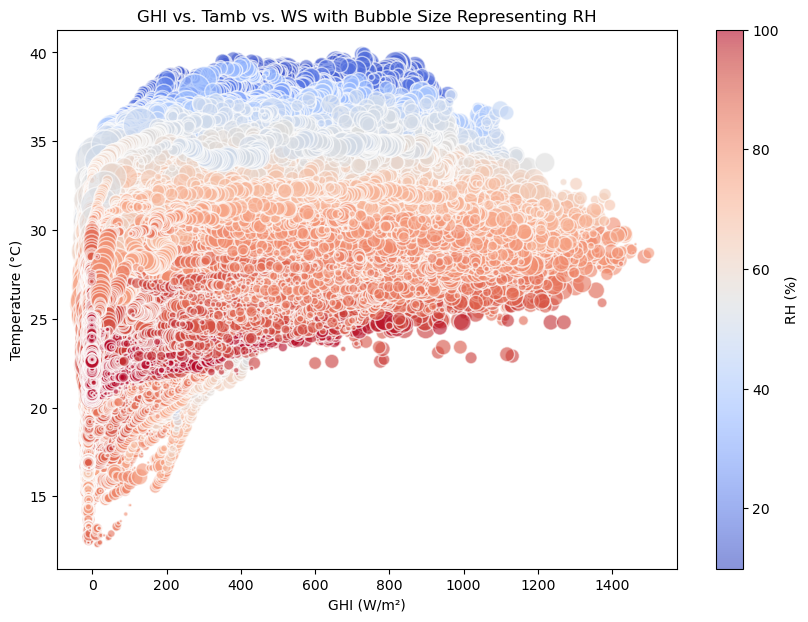

In [14]:
def plot_bubble_chart(df):
    plt.figure(figsize=(10, 7))

    bubble_size = df['WS'] * 50 
    plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolor='w')

    plt.title('GHI vs. Tamb vs. WS with Bubble Size Representing RH')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Temperature (°C)')
    plt.colorbar(label='RH (%)')
    plt.show()

plot_bubble_chart(df)

In [15]:
def drop_null_columns(df):
    """Drop columns that are completely null."""
    df_clean = df.copy()
    df_clean = df_clean.dropna(axis=1, how='all')
    dropped_columns = set(df.columns) - set(df_clean.columns)
    print("Dropped columns (completely null):", dropped_columns)
    return df_clean

def fill_missing_values(df):
    """Fill missing values with the mean of each column."""
    df_clean = df.copy()
    df_clean = df_clean.fillna(df_clean.mean())
    missing_values_after_fill = df_clean.isnull().sum()
    print("Remaining missing values after filling with mean:\n", missing_values_after_fill)
    return df_clean

def handle_negative_values(df):
    """Handle negative values by replacing them with NaN."""
    df_clean = df.copy()
    df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = pd.NA
    negative_ghi = df_clean['GHI'][df_clean['GHI'] < 0].count()
    nan_in_ghi = df_clean['GHI'].isna().sum()
    print(f"Negative GHI values after cleaning: {negative_ghi}")
    print(f"NaN values in GHI after replacing negative values: {nan_in_ghi}")
    return df_clean

def clean_data(df):
    df_clean = drop_null_columns(df)
    df_clean = fill_missing_values(df_clean)
    df_clean = handle_negative_values(df_clean)
    return df_clean

df_clean = clean_data(df)

Dropped columns (completely null): {'Comments'}
Remaining missing values after filling with mean:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Negative GHI values after cleaning: 0
NaN values in GHI after replacing negative values: 261135
